In [6]:
import os
os.chdir('/home/gsalinas/GitHub/nbaaxionns/')

import numpy as np
import multiprocessing as mp
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['figure.dpi']= 128

from classes import AxionMiniclusterNFW, NeutronStar, Particles, AxionStar
from typing import Callable

from scripts import (repeat, selectrvs, metropolis, rdistr, rm_far,
                    min_approach, energy, grav_en, add_ps, nums_vs, mag, roche, G,
                    trajAC, cylmax, trajs, trajAC, metropolis, randdirs3d, drawrvs,
                    myint, myintfrom, myintupto)
from main import repr

In [7]:
pdistr = np.load("input/AS_profile_2R99.npy")[::100]
AS = AxionStar(prf=pdistr)

In [8]:
print(repr(AS))

---------- Axion Clump properties ----------
Clump type:                 Dilute Axion Star
Mass:                       1.0 x 10^-12 M_Sun
Radius 99%:                 2.64e+03 km
Truncation Radius:          5.28e+03 km
Velocity dispersion:        None



In [9]:
positions = np.array([[0., 0.2, 0.], [0.1, -1.2, 0.]])*AS.rtrunc()

AS.rho_prf(positions)

array([5.54895737e-13,            nan])

In [10]:
AS.rho_prf(0.2*AS.rtrunc())

5.548957370731092e-13

In [11]:
rs = np.linspace(1e-8, AS.rtrunc(), 100)
fake_rs = np.array([[0., 0., r]for r in rs])

rhos = AS.rho_prf(fake_rs)

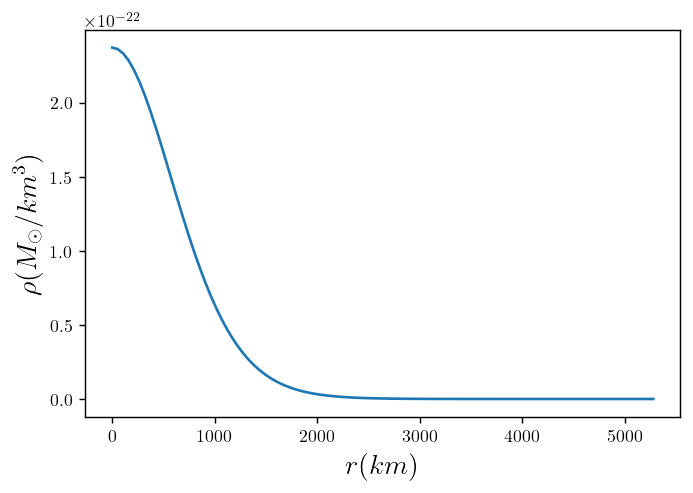

In [12]:
plt.plot(rs, 1e-10*rhos)
plt.xlabel("$r(km)$", fontsize=16)
plt.ylabel("$\\rho(M_\odot/km^3)$", fontsize=16);

In [13]:
np.trapz(4*np.pi*rs**2*rhos, rs)

0.009999998778618954

In [14]:
AS.encl_mass(positions)

array([0.00512992, 0.01      ])

In [15]:
AS.encl_mass(0.2*AS.rtrunc())

0.005129915462679832

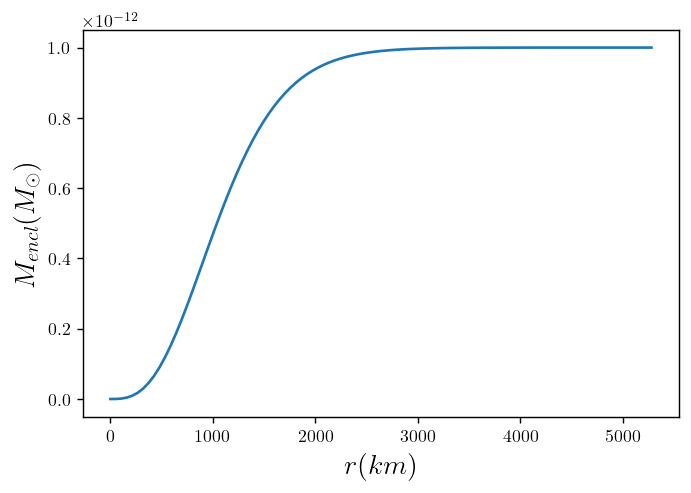

In [16]:
encl_ms = np.array(list(AS.encl_mass(fake_rs)))
plt.plot(rs, 1e-10*encl_ms)
plt.xlabel("$r(km)$", fontsize=16)
plt.ylabel("$M_{encl}(M_\odot)$", fontsize=16);

In [17]:
list(AS.grav_pot(positions))

[-0.00010918919130870449, -2.0873355534752915e-05]

In [18]:
AS.grav_pot(0.2*AS.rtrunc())

-0.00010918919130871002

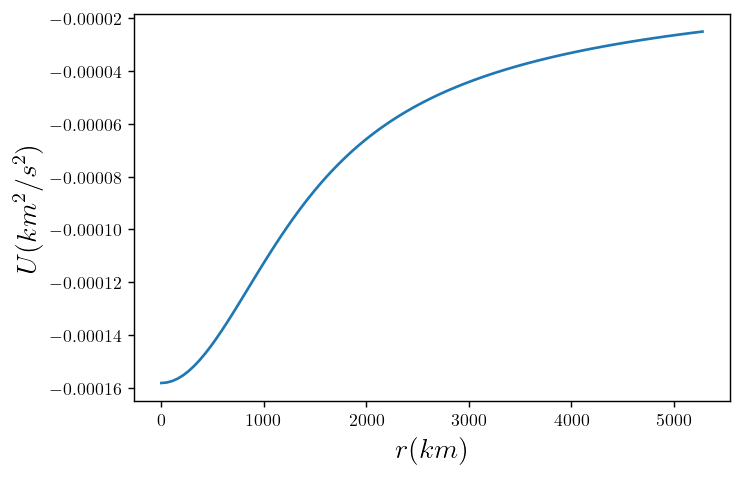

In [19]:
grav_pots = np.array(list(AS.grav_pot(fake_rs)))
plt.plot(rs, grav_pots)
plt.xlabel("$r(km)$", fontsize=16)
plt.ylabel("$U(km^2/s^2)$", fontsize=16);

In [20]:
positions = np.array([[0., 0.5, 0.]]*10_000)*AS.rtrunc()

In [16]:
%timeit AS.rho_prf(positions)

222 µs ± 29.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [17]:
%timeit AS.encl_mass(positions)

4.54 ms ± 409 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%timeit AS.grav_pot(positions)

44.3 ms ± 3.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


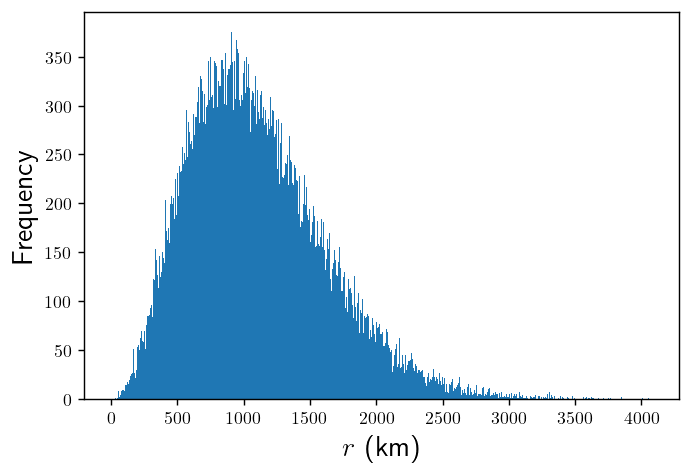

In [21]:
nrs = 100_000
rsdrawn = np.abs(AS.rtrunc()*np.array(list(metropolis(rdistr, nrs, 0.2, 0.05, O=AS))))

plt.hist(rsdrawn, bins=np.linspace(0., max(rsdrawn), 1000))
plt.xlabel("$r$ (km)", fontsize=16)
plt.ylabel("Frequency", fontsize=16);

In [22]:
positions = nums_vs(rsdrawn, np.array(list(randdirs3d(len(rsdrawn)))))
XX, YY, ZZ = positions.T

npoints = 10_000
marker_data = go.Scatter3d(
    x=XX[-npoints:], 
    y=YY[-npoints:], 
    z=ZZ[-npoints:], 
    marker=go.scatter3d.Marker(size=1), 
    opacity=0.8, 
    mode='markers'
)
fig=go.Figure(data=marker_data)
fig.show()

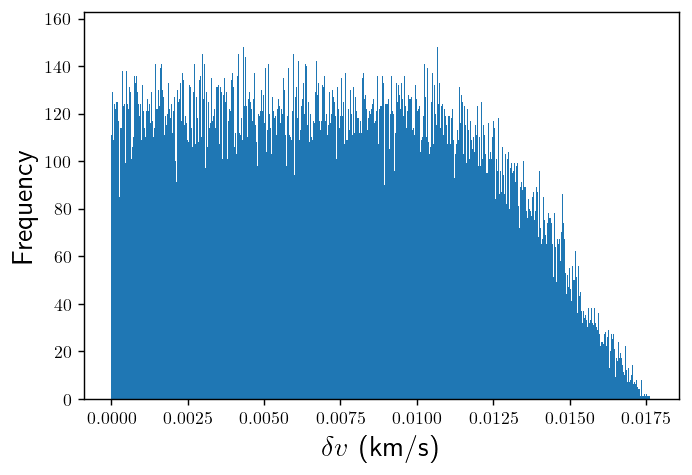

In [24]:
plt.hist(mag(AS.vsdisp(positions)), bins=np.linspace(0., max(mag(AS.vsdisp(positions))), 1000))
plt.xlabel("$\delta v$ (km/s)", fontsize=16)
plt.ylabel("Frequency", fontsize=16);